Initial setup

In [19]:
%load_ext autoreload
%autoreload 2

#modules for setting the path
import os
import sys
module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)

#modules for opening the data
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt


#Retrieving postgres info
from src.data import local
PORT = local.port
USER = local.user
HOST = local.host
PASSWORD = local.password

DBNAME = "opportunity_youth"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
conn = psycopg2.connect(dbname=DBNAME, user=USER, password=PASSWORD, port=PORT, host=HOST)

<h1>First let's take a look at the puma_names_2010 table.</h1>

In [4]:
query = """
SELECT *
FROM puma_names_2010
"""

puma_names_table = pd.read_sql(query, conn)

puma_names_table.head()

,state_fips,state_name,cpuma0010,puma,geoid,gisjoin,puma_name
0,1,Alabama ...,1,100,100100,G01000100,"Lauderdale, Colbert, Franklin & Marion (Northe..."
1,1,Alabama ...,1,800,100800,G01000800,St. Clair & Blount Counties ...
2,1,Alabama ...,1,1400,101400,G01001400,"Walker, Marion (South & West), Fayette & Lamar..."
3,1,Alabama ...,1,1500,101500,G01001500,Tuscaloosa (Outer) & Pickens Counties--Northpo...
4,1,Alabama ...,1,1600,101600,G01001600,Tuscaloosa & Northport (Southeast) Cities ...


Let's see if we can find south king county

In [5]:
query = """
SELECT *
FROM puma_names_2010
WHERE puma_name LIKE '%King%'
"""

skc_search = pd.read_sql(query, conn)

skc_search

,state_fips,state_name,cpuma0010,puma,geoid,gisjoin,puma_name
0,6,California ...,69,3100,603100,G06003100,Kings County--Hanford City ...
1,25,Massachusetts ...,457,4903,2504903,G25004903,"Plymouth County (East)--Plymouth, Marshfield, ..."
2,36,New York ...,702,3701,3603701,G36003701,"NYC-Bronx Community District 8--Riverdale, Fie..."
3,42,Pennsylvania ...,862,801,4200801,G42000801,Luzerne County (East)--Kingston Borough ...
4,42,Pennsylvania ...,889,3103,4203103,G42003103,Montgomery County (Southwest)--King of Prussia...
5,47,Tennessee ...,931,1000,4701000,G47001000,Hawkins & Sullivan (Northwest) Counties--Kings...
6,51,Virginia ...,1017,51215,5151215,G51051215,"Hanover, Powhatan, Goochland, New Kent, King W..."
7,53,Washington ...,1044,11606,5311606,G53011606,"King County (Northwest)--Shoreline, Kenmore & ..."
8,53,Washington ...,1044,11607,5311607,G53011607,"King County (Northwest)--Redmond, Kirkland Cit..."
9,53,Washington ...,1044,11608,5311608,G53011608,King County (Northwest Central)--Greater Belle...


It looks like King County is listed here but there are multiple entries for the southern part of king county. We may need to compare the puma_name descriptions with a clear definition of 'South King County'. We may need to compare with the Roadmap data brief.

<h1>wa_geo_xwalk exploration</h1>

In [6]:
query = """
SELECT *
FROM wa_geo_xwalk
"""

skc_search = pd.read_sql(query, conn)

skc_search.columns

Index(['tabblk2010', 'st', 'stusps', 'stname', 'cty', 'ctyname', 'trct',
       'trctname', 'bgrp', 'bgrpname', 'cbsa', 'cbsaname', 'zcta', 'zctaname',
       'stplc', 'stplcname', 'ctycsub', 'ctycsubname', 'stcd116',
       'stcd116name', 'stsldl', 'stsldlname', 'stsldu', 'stslduname',
       'stschool', 'stschoolname', 'stsecon', 'dtseconname', 'trib',
       'tribname', 'tsub', 'tsubname', 'stanrc', 'stanrcname', 'necta',
       'nectname', 'mil', 'milname', 'stwib', 'stwibname', 'blklatdd',
       'blklondd', 'createdate'],
      dtype='object')

In [7]:
skc_search.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195574 entries, 0 to 195573
Data columns (total 43 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   tabblk2010    195574 non-null  object 
 1   st            195574 non-null  object 
 2   stusps        195574 non-null  object 
 3   stname        195574 non-null  object 
 4   cty           195574 non-null  object 
 5   ctyname       195574 non-null  object 
 6   trct          195574 non-null  object 
 7   trctname      195574 non-null  object 
 8   bgrp          195574 non-null  object 
 9   bgrpname      195574 non-null  object 
 10  cbsa          195574 non-null  object 
 11  cbsaname      175100 non-null  object 
 12  zcta          195574 non-null  object 
 13  zctaname      192838 non-null  object 
 14  stplc         195574 non-null  object 
 15  stplcname     113097 non-null  object 
 16  ctycsub       195574 non-null  object 
 17  ctycsubname   195574 non-null  object 
 18  stcd

Looks like wa_geo_xwalk contaings tracts under the 'trct' and 'trctname' columns as well as longitude and latitude info under the 'blklatdd' and 'blklondd' columns.

In [8]:
query = """
SELECT st, stname, cty, ctyname
FROM wa_geo_xwalk
"""

skc_search = pd.read_sql(query, conn)

In [9]:
print(skc_search.stname.unique())

['Washington                                                                                          '
 'Oregon                                                                                              '
 'Idaho                                                                                               ']


It only covers the above 3 states.

<h1>pums_2017</h1>

In [54]:
query = """
            SELECT p.puma, rtrim(puma_name), agep,
            CASE WHEN p.sch = '1' THEN 'Has not attended in last 3 months'
                 WHEN p.sch IN ('2','3') THEN 'public or private school or college and homeschool'
                 END as School,
            CASE WHEN p.schl in ('16','17') THEN 'HS diploma or GED'
                 WHEN p.schl in ('18','19','20','21','22','23','24') THEN 'post HS education'
                 ELSE 'No HS or GED'
                 END as Education_attainment,
            CASE WHEN p.dis = '1' THEN 'reported disability'
                 ELSE 'no reported disability'
                 END as disability_status,
            CASE WHEN p.esp in ('1','2','3','5','6','7','8') THEN 'One or both parents in labor force'
                 WHEN p.esp = '4' THEN 'Neither parent in labor force'
                 END as Parent_employment,
            CASE WHEN p.esr in ('1','2') THEN 'employed'
                 WHEN p.esr in ('3','6') THEN 'Unemployed/not in labor force'
                 WHEN p.esr IN ('4','5') THEN 'Armed Forces'
                 END as Employment_status,
            CASE WHEN p.sex = '1' THEN 'male'
                 ELSE 'female'
                 END as gender,
            indp,
            povpip,
            SUM(pwgtp) as Weighted_Total
            FROM pums_2017 p
            JOIN puma_names_2010 n on p.puma = n.puma
            WHERE state_name = 'Washington'
            AND p.puma IN ('11610', '11611', '11612', '11613', '11614', '11615')
            AND agep BETWEEN 16 AND 24
            GROUP BY school, education_attainment, disability_status, employment_status, Parent_employment, indp, povpip,
                     agep, sex, rtrim(puma_name), p.puma
            ORDER BY school, agep DESC"""

skc_youth_2017 = pd.read_sql(query, conn)

In [58]:
query = """
            SELECT p.puma, rtrim(puma_name), agep,
            CASE WHEN p.sch = '1' THEN 'Has not attended in last 3 months'
                 WHEN p.sch IN ('2','3') THEN 'public or private school or college and homeschool'
                 END as School,
            CASE WHEN p.schl in ('16','17') THEN 'HS diploma or GED'
                 WHEN p.schl in ('18','19','20','21','22','23','24') THEN 'post HS education'
                 ELSE 'No HS or GED'
                 END as Education_attainment,
            CASE WHEN p.dis = '1' THEN 'reported disability'
                 ELSE 'no reported disability'
                 END as disability_status,
            CASE WHEN p.esp in ('1','2','3','5','6','7','8') THEN 'One or both parents in labor force'
                 WHEN p.esp = '4' THEN 'Neither parent in labor force'
                 END as Parent_employment,
            CASE WHEN p.esr in ('1','2') THEN 'employed'
                 WHEN p.esr in ('3','6') THEN 'Unemployed/not in labor force'
                 WHEN p.esr IN ('4','5') THEN 'Armed Forces'
                 END as Employment_status,
            CASE WHEN p.sex = '1' THEN 'male'
                 ELSE 'female'
                 END as gender,
            indp,
            povpip,
            SUM(pwgtp) as Weighted_Total
            FROM pums_2018 p
            JOIN puma_names_2010 n on p.puma = n.puma
            WHERE state_name = 'Washington'
            AND p.puma IN ('11610', '11611', '11612', '11613', '11614', '11615')
            AND agep BETWEEN 16 AND 24
            GROUP BY school, education_attainment, disability_status, employment_status, Parent_employment, indp, povpip,
                     agep, sex, rtrim(puma_name), p.puma
            ORDER BY school, agep DESC"""

skc_youth_2018 = pd.read_sql(query, conn)

In [66]:
skc_youth_2017.employment_status.unique()

array(['employed', 'Unemployed/not in labor force', 'Armed Forces'],
      dtype=object)

In [69]:
oy_youth_2018 = skc_youth_2018[(skc_youth_2018['school'] == 'Has not attended in last 3 months') &
                               (skc_youth_2018['employment_status'] == 'Unemployed/not in labor force')]
oy_youth_2018

,puma,rtrim,agep,school,education_attainment,disability_status,parent_employment,employment_status,gender,indp,povpip,weighted_total
68,11615,"King County (Southeast)--Maple Valley, Covingt...",24.0,Has not attended in last 3 months,HS diploma or GED,no reported disability,None,Unemployed/not in labor force,male,0770,197.0,37.0
69,11611,"King County (West Central)--Burien, SeaTac, Tu...",24.0,Has not attended in last 3 months,HS diploma or GED,no reported disability,None,Unemployed/not in labor force,male,1270,204.0,38.0
70,11611,"King County (West Central)--Burien, SeaTac, Tu...",24.0,Has not attended in last 3 months,HS diploma or GED,no reported disability,None,Unemployed/not in labor force,male,4470,113.0,49.0
71,11613,King County (Southwest Central)--Kent City,24.0,Has not attended in last 3 months,HS diploma or GED,no reported disability,None,Unemployed/not in labor force,female,5391,0.0,45.0
72,11610,"King County (Central)--Renton City, Fairwood, ...",24.0,Has not attended in last 3 months,HS diploma or GED,no reported disability,None,Unemployed/not in labor force,female,5391,501.0,68.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1437,11614,King County (Southwest)--Auburn City & Lakeland,16.0,Has not attended in last 3 months,No HS or GED,no reported disability,One or both parents in labor force,Unemployed/not in labor force,female,None,501.0,23.0
1438,11611,"King County (West Central)--Burien, SeaTac, Tu...",16.0,Has not attended in last 3 months,No HS or GED,no reported disability,None,Unemployed/not in labor force,male,None,0.0,12.0
1439,11614,King County (Southwest)--Auburn City & Lakeland,16.0,Has not attended in last 3 months,No HS or GED,no reported disability,None,Unemployed/not in labor force,male,None,39.0,47.0
1440,11612,"King County (Far Southwest)--Federal Way, Des ...",16.0,Has not attended in last 3 months,No HS or GED,no reported disability,None,Unemployed/not in labor force,female,None,169.0,13.0


In [65]:
skc_youth_2018[skc_youth_2018['parent_employment']].weighted_total.sum()

parent_employment
Neither parent in labor force           147.0
One or both parents in labor force    18925.0
Name: weighted_total, dtype: float64

<BarContainer object of 2 artists>

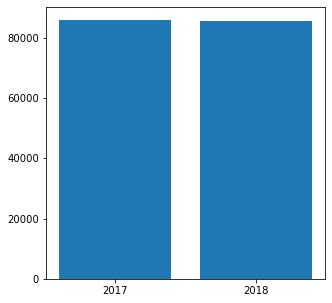

In [70]:
fig, ax = plt.subplots(1,1, figsize=(5,5))
ax.bar(x=['2017', '2018',], height=[total_skc_youth_2017,total_skc_youth_2018])

In [81]:
def compare_oy_with_total_youth(variable_and_status, youth_df):
    #takes a tuple, variable_and_status, that is compsed of the variable column you want to check 
    #and the status which you want to compare. Also takes the data frame you want to look at.
    variable = variable_and_status[0]
    status = variable_and_status[1]
    
    oy = youth_df[(youth_df['school'] == 'Has not attended in last 3 months') &
                  (youth_df['employment_status'] == 'Unemployed/not in labor force')]
    
    oy_total = oy.weighted_total.sum()
    oy_var_total = oy[oy[variable] == status].weighted_total.sum()
    oy_prct = oy_var_total/oy_total
    
    youth_total = youth_df.weighted_total.sum()
    youth_var_total = youth_df[youth_df[variable] == status].weighted_total.sum()
    youth_prct = youth_var_total/youth_total
    
    return {'Total Youth (ages 16-14)': youth_prct, 'Opportunity Youth': oy_prct}

compare_oy_with_total_youth(('disability_status', 'reported disability'),skc_youth_2018)

{'Total Youth (ages 16-14)': 0.06266471449487555,
 'Opportunity Youth': 0.15939220885172342}

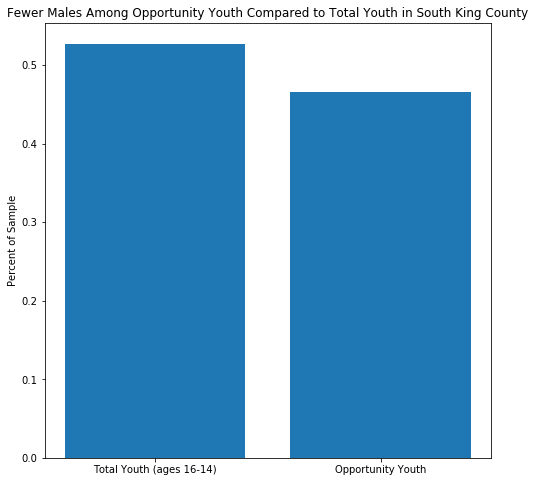

In [110]:
comparison_dict = compare_oy_with_total_youth(('gender', 'male'),skc_youth_2017)

col_names = list(comparison_dict.keys())
height_values = list(comparison_dict.values())

fig, ax = plt.subplots(1,1, figsize=(8,8))

ax.set_title('Fewer Males Among Opportunity Youth Compared to Total Youth in South King County')
ax.set_ylabel('Percent of Sample')

ax.bar(x=col_names, height=height_values);


In [84]:
skc_youth_2018.parent_employment.unique()

array([None, 'One or both parents in labor force',
       'Neither parent in labor force'], dtype=object)

<BarContainer object of 2 artists>

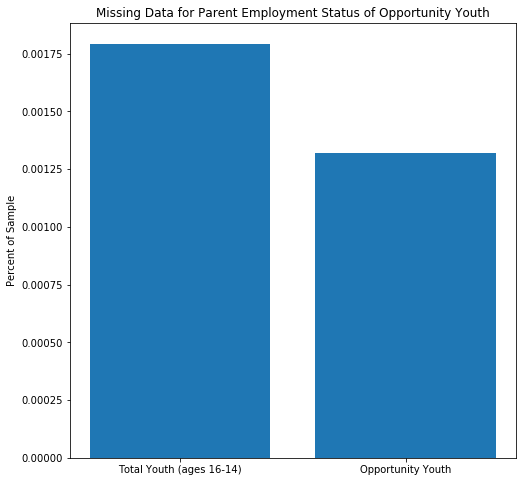

In [107]:
comparison_dict = compare_oy_with_total_youth(('parent_employment', 'Neither parent in labor force'),skc_youth_2017)

col_names = list(comparison_dict.keys())
height_values = list(comparison_dict.values())

fig, ax = plt.subplots(1,1, figsize=(8,8))

ax.set_title('Missing Data for Parent Employment Status of Opportunity Youth')
ax.set_ylabel('Percent of Sample')

ax.bar(x=col_names, height=height_values)


<BarContainer object of 2 artists>

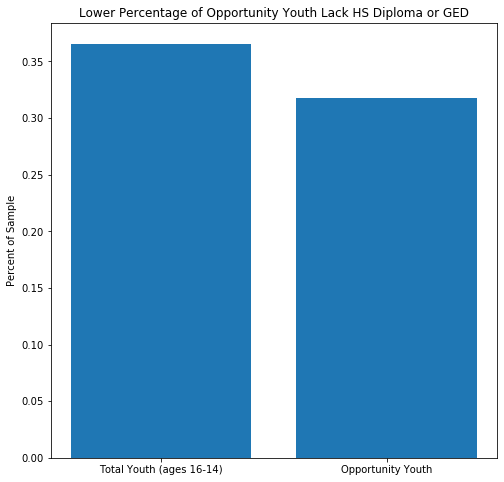

In [108]:
comparison_dict = compare_oy_with_total_youth(('education_attainment', 'No HS or GED'),skc_youth_2017)

col_names = list(comparison_dict.keys())
height_values = list(comparison_dict.values())

fig, ax = plt.subplots(1,1, figsize=(8,8))

ax.set_title('Lower Percentage of Opportunity Youth Lack HS Diploma or GED')
ax.set_ylabel('Percent of Sample')

ax.bar(x=col_names, height=height_values)


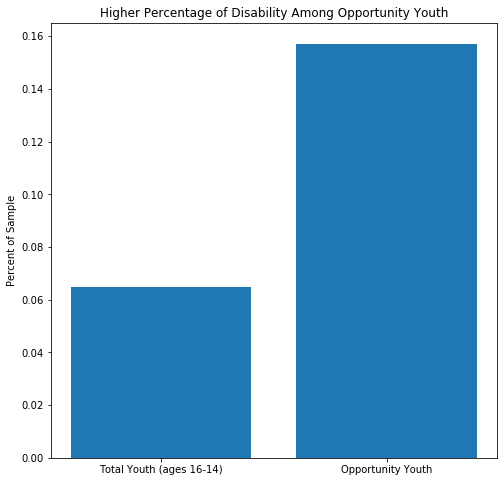

In [109]:
comparison_dict = compare_oy_with_total_youth(('disability_status', 'reported disability'),skc_youth_2017)

col_names = list(comparison_dict.keys())
height_values = list(comparison_dict.values())

fig, ax = plt.subplots(1,1, figsize=(8,8))

ax.set_title('Higher Percentage of Disability Among Opportunity Youth')
ax.set_ylabel('Percent of Sample')

ax.bar(x=col_names, height=height_values);
plt.savefig('Disability.png')